#### Objective:

* Identify visual patterns that explain why customers churn.
* Convert raw metrics into insights that guide retention strategy.

#### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load cleaned data
df = pd.read_csv('../data/processed/telco_churn_cleaned.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_yes,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


## Chart Implementations

### 1. Target Distribution

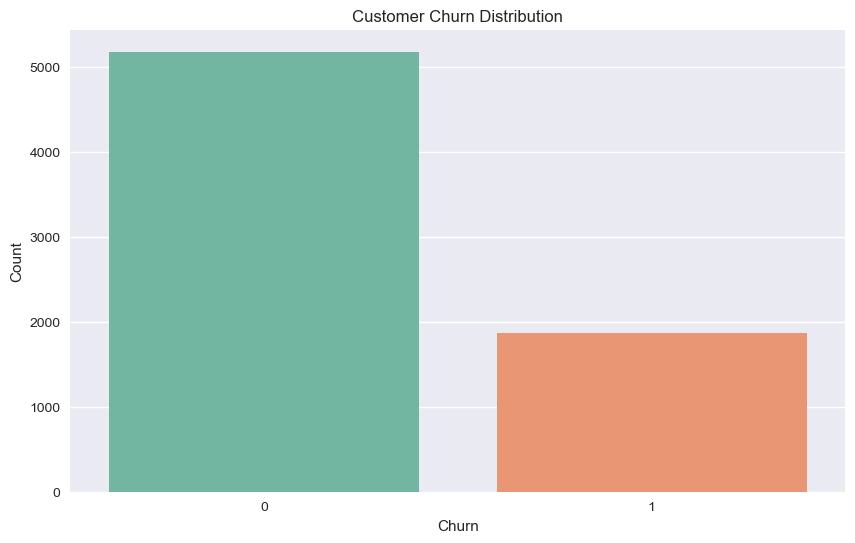

In [3]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.savefig('../reports/figures/senior_citizen_vs_churn.png', dpi=200, bbox_inches='tight')
plt.show()

* Roughly 25–30% of customers have churned → significant imbalance.
* Business Use: Focus retention efforts on the smaller churned segment through targeted offers, loyalty programs, or feedback collection.

### 2. Gender vs Churn

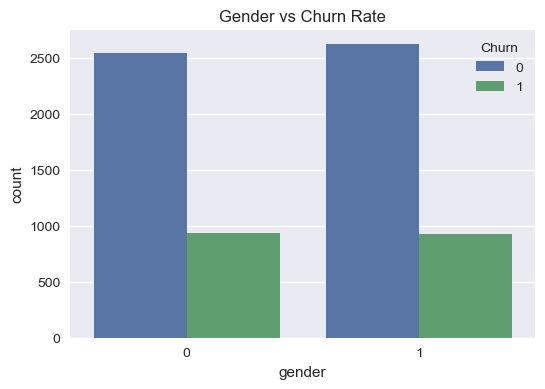

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Gender vs Churn Rate")
plt.savefig('../reports/figures/gender_vs_churn.png', dpi=200, bbox_inches='tight')
plt.show()


* Churn rate is nearly equal across genders.
* Business Use: Gender is not a major driver — retention strategies should not differ by gender.

### 3. Senior Citizens vs Churn

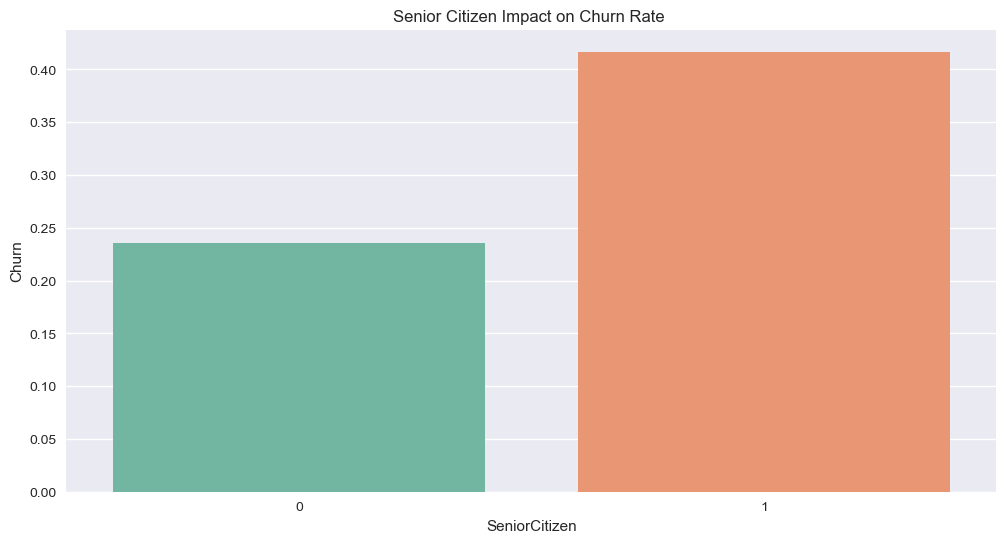

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(x="SeniorCitizen", y="Churn", data=df, ci=None, palette='Set2')
plt.title("Senior Citizen Impact on Churn Rate ")
plt.savefig('../reports/figures/senior_citizen_vs_churn.png', dpi=200, bbox_inches='tight')
plt.show()

* Senior citizens churn at a higher rate.
* Business Use: Provide senior-friendly service bundles or personalized call assistance to reduce confusion or frustration with technology.

### 4. Tenure Distribution

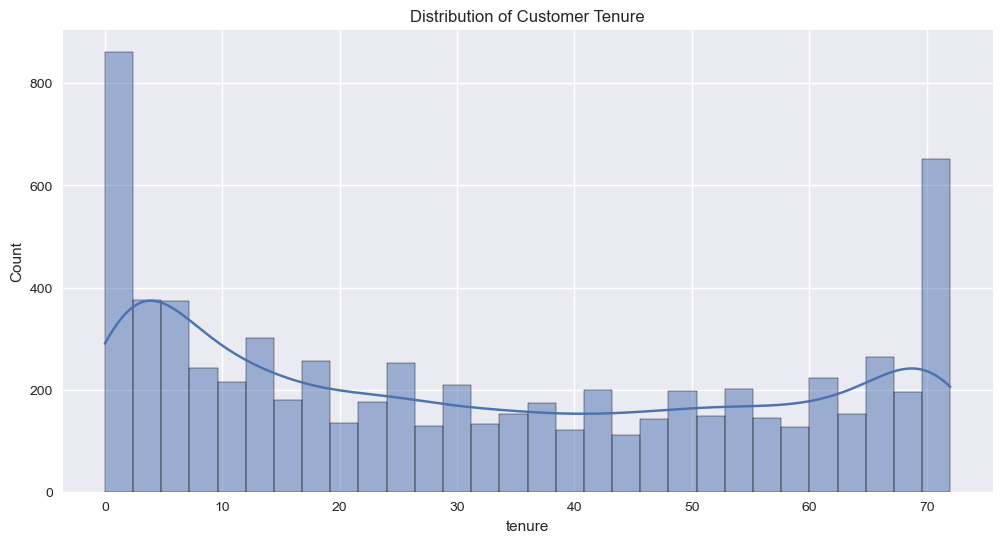

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Customer Tenure')
plt.savefig('../reports/figures/tenure_distribution.png', dpi=200, bbox_inches='tight') 
plt.show()

* Newer customers (shorter tenure) churn more frequently.
* Business Use: Onboard new customers better — e.g., welcome calls, check-in emails, loyalty milestones at 3/6 months.

### 5. Monthly Charges vs Churn

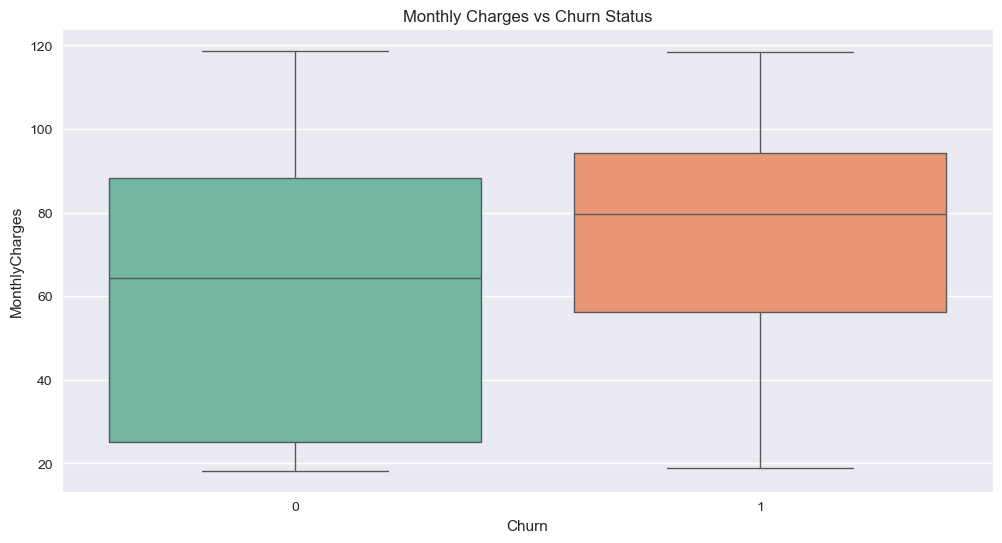

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title("Monthly Charges vs Churn Status")
plt.savefig('../reports/figures/monthly_charges_vs_churn.png', dpi=200, bbox_inches='tight')
plt.show()

* Churned customers often pay higher monthly charges.
* Business Use: Introduce flexible or discounted plans to retain high-bill customers; offer value-based upgrades instead of flat increases.

### 6. Contract Type vs Churn

In [8]:
# Reconstruct a readable contract category
df['contract_type'] = 'Month-to-month'  # default baseline
df.loc[df['Contract_one year'] == 1, 'contract_type'] = 'One year'
df.loc[df['Contract_two year'] == 1, 'contract_type'] = 'Two year'

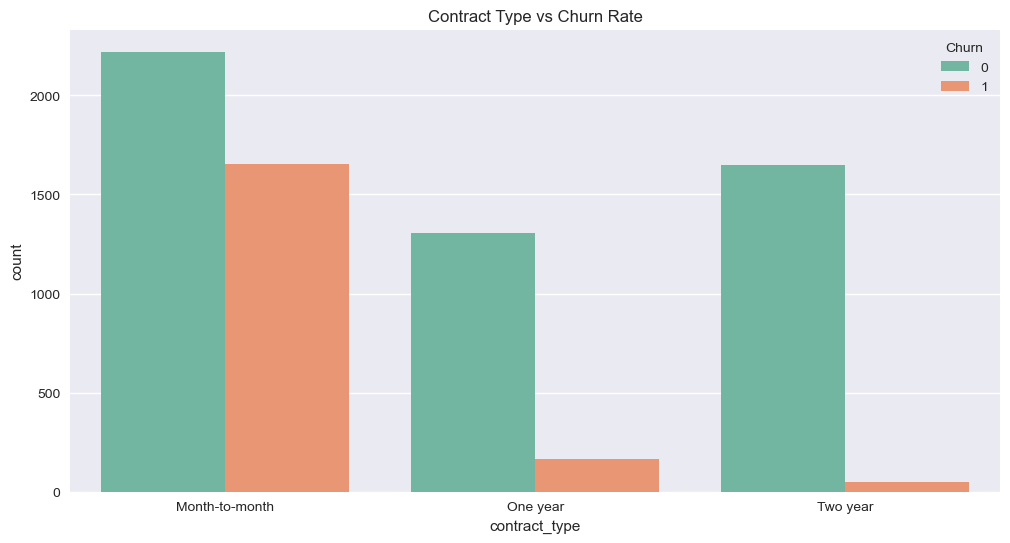

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='contract_type', hue='Churn', data=df, palette='Set2')
plt.title("Contract Type vs Churn Rate")
plt.savefig('../reports/figures/contract_type_vs_churn.png', dpi=200, bbox_inches='tight')
plt.show()

* Customers on short-term (month-to-month) contracts churn far more often than those on long-term agreements.

##### Real-World Use:

* Offer small discounts or loyalty benefits for converting month-to-month users to annual plans.

* Use churn probability scores to target short-term customers with renewal offers

### 7. Internet Service vs Churn

In [10]:
# Create human-readable Internet Service column
df['internet_service_type'] = 'DSL'   # default assumption

df.loc[df['InternetService_fiber optic'] == 1, 'internet_service_type'] = 'Fiber optic'
df.loc[df['InternetService_no'] == 1, 'internet_service_type'] = 'No Internet'


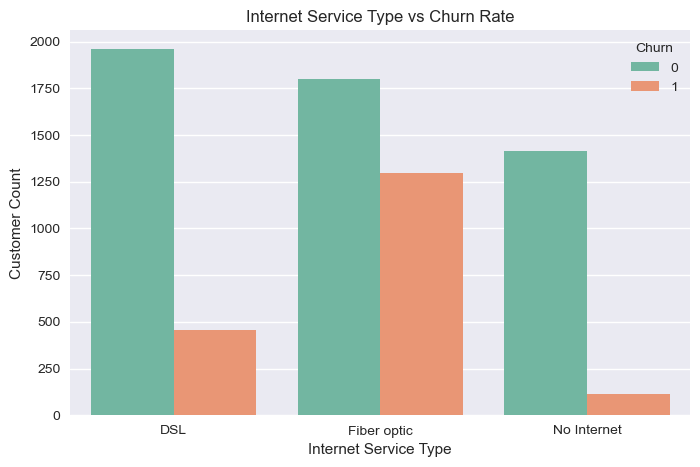

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='internet_service_type', hue='Churn', data=df, palette='Set2')
plt.title("Internet Service Type vs Churn Rate")
plt.xlabel("Internet Service Type")
plt.ylabel("Customer Count")
plt.savefig('../reports/figures/internet_service_vs_churn.png', dpi=200, bbox_inches='tight')
plt.show()


Fiber-optic customers churn at much higher rates than DSL or no-internet customers.
* Real-world use: improve fiber reliability and communicate its value clearly to reduce churn.

### 8. Payment Method vs Churn

In [12]:
# Build human-readable Payment Method column
df['payment_method_type'] = 'Bank transfer (automatic)'  # base category (drop_first in encoding)

df.loc[df['PaymentMethod_credit card (automatic)'] == 1, 'payment_method_type'] = 'Credit card (automatic)'
df.loc[df['PaymentMethod_electronic check'] == 1, 'payment_method_type'] = 'Electronic check'
df.loc[df['PaymentMethod_mailed check'] == 1, 'payment_method_type'] = 'Mailed check'


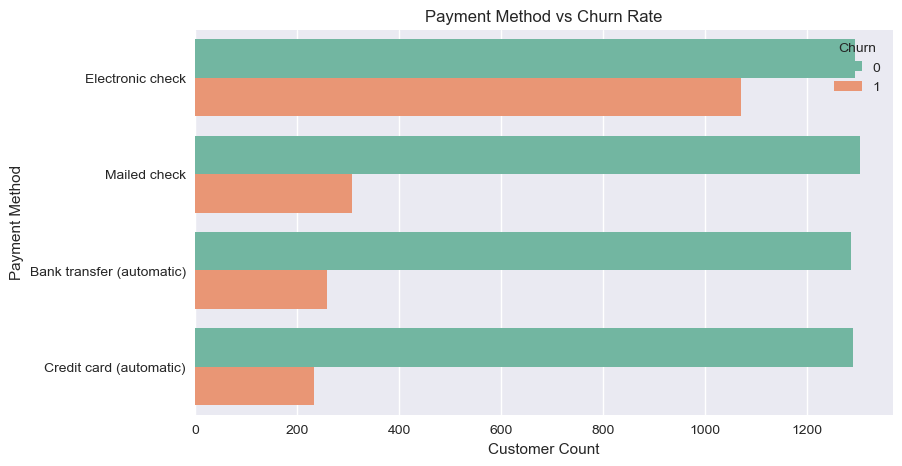

In [13]:
plt.figure(figsize=(9,5))
sns.countplot(y='payment_method_type', hue='Churn', data=df, palette='Set2')
plt.title("Payment Method vs Churn Rate")
plt.xlabel("Customer Count")
plt.ylabel("Payment Method")
plt.savefig('../reports/figures/payment_method_vs_churn.png', dpi=200, bbox_inches='tight')
plt.show()


* Customers paying via electronic check churn the most.
* Real-world use: incentivize auto-payment (credit card/bank transfer) to reduce missed or manual-payment churn.

### 9. Feature Importance (Model-Based Insight)

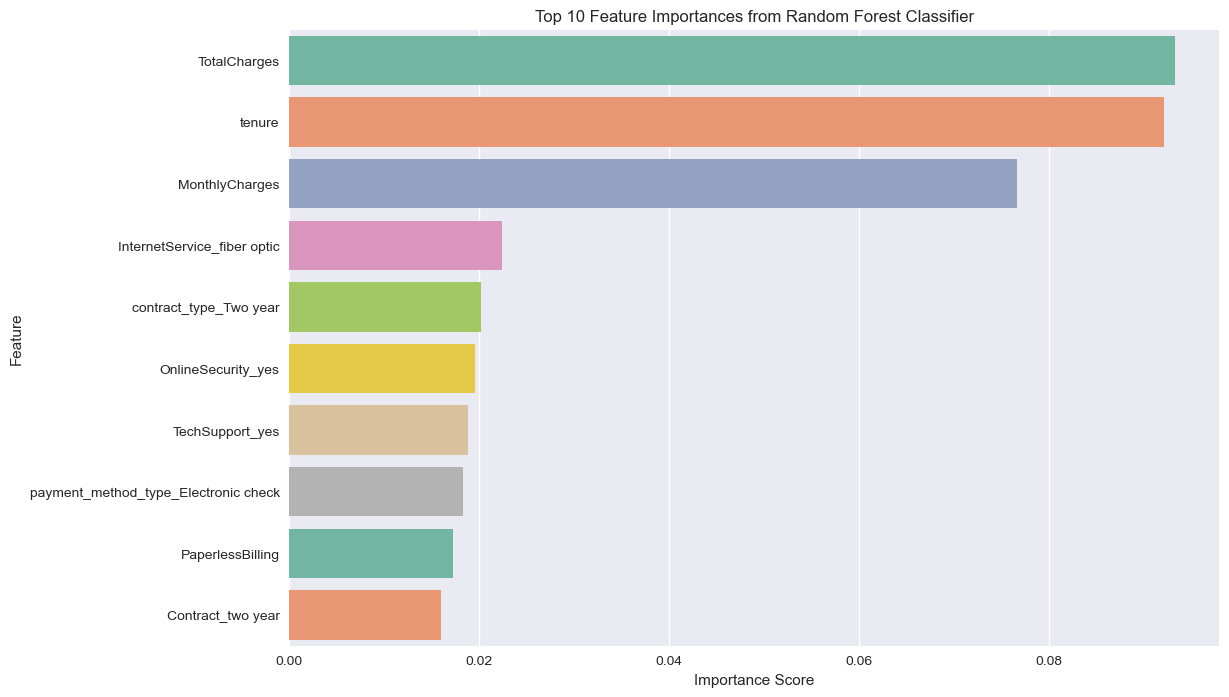

In [16]:
from sklearn.ensemble import RandomForestClassifier
x = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)
y = df['Churn']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x, y)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x, y)
importances = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)[:10]

plt.figure(figsize=(12,8))
sns.barplot(x=importances.values, y=importances.index, palette='Set2')
plt.title("Top 10 Feature Importances from Random Forest Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.savefig('../reports/figures/feature_importances.png', dpi=200, bbox_inches='tight')
plt.show()

* Contract Type, Tenure, Monthly Charges, Payment Method, and Online Security.
* Business Use:
 Focus retention programs on contract renewal, price sensitivity, and add-on services like online security.

### Final Storytelling

#### Business Story Summary
1. **Contract Type** is the single biggest churn driver — short-term contracts = high risk.  
2. **Monthly Charges** correlate positively with churn → pricing optimization needed.  
3. **Fiber Optic Users** and **Electronic Check Payers** show elevated churn → service and billing experience must be improved.  
4. **Long-Tenure Customers** are highly loyal → introduce loyalty rewards to reinforce retention.  
5. **Senior Customers** need tailored communication and simpler plans.

**Real-World Impact:**  
This analysis helps design **data-driven retention strategies**, reducing churn through:
- Targeted offers for short-term plan holders  
- Tiered pricing for high-value customers  
- Onboarding focus for new users  
- Auto-pay campaigns for electronic check users  
